# Data and Model Exploration

This dataframe explores the dataset collected and tests different models to see which model may be best suited for predicting presence with the recorded scenario.

In [1]:
# set working directoy to root directory of the project
if not "working_directory_corrected" in vars():
    %cd ..
    %cd ..
    %cd ..
    working_directory_corrected = True
    
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

from examples.simple_scenario.src.simple_scenario import create_simple_scenario

c:\Users\frank\Documents\Research\projects\evohome\environment\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


c:\Users\frank\Documents\Research\projects\evohome\examples\simple_scenario
c:\Users\frank\Documents\Research\projects\evohome\examples
c:\Users\frank\Documents\Research\projects\evohome


## Data Exploration

Below we load the dataset and observe it's general properties:

In [2]:
scenario = create_simple_scenario()
data_frame = pd.read_pickle("examples/simple_scenario/data/recording.pickle")
room_names = scenario.get_room_names()
nr_rooms = len(room_names)
print(f"The dataframe has {len(data_frame)} samples.")
print(f"The example scenario has {nr_rooms} rooms.")
print("below are five random samples")
data_frame

The dataframe has 129600 samples.
The example scenario has 11 rooms.
below are five random samples


,date,room_0,prediction_0,weather,room_1,prediction_1,room_2,prediction_2,room_3,prediction_3,...,prediction_7,room_8,prediction_8,room_9,prediction_9,room_10,prediction_10,weekday,hour,minute
0,2020-06-06 00:01:00,0,None,0.468096,0,None,1,None,1,None,...,None,0,None,0,None,0,None,5,0,1
1,2020-06-06 00:02:00,0,None,0.458103,0,None,1,None,1,None,...,None,0,None,0,None,0,None,5,0,2
2,2020-06-06 00:03:00,0,None,0.468114,0,None,1,None,1,None,...,None,0,None,0,None,0,None,5,0,3
3,2020-06-06 00:04:00,0,None,0.458130,0,None,1,None,1,None,...,None,0,None,0,None,0,None,5,0,4
4,2020-06-06 00:05:00,0,None,0.468151,0,None,1,None,1,None,...,None,0,None,0,None,0,None,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129595,2020-09-03 23:56:00,0,None,0.251122,0,None,1,None,1,None,...,None,0,None,0,None,0,None,3,23,56
129596,2020-09-03 23:57:00,0,None,0.241110,0,None,1,None,1,None,...,None,0,None,0,None,0,None,3,23,57
129597,2020-09-03 23:58:00,0,None,0.231101,0,None,1,None,1,None,...,None,0,None,0,None,0,None,3,23,58
129598,2020-09-03 23:59:00,0,None,0.221096,0,None,1,None,1,None,...,None,0,None,0,None,0,None,3,23,59


Below we calculate the utilization per room. This will tell us how often a presence is detected in the respective rooms in our data.

In [3]:
nr_samples = len(data_frame)
for room_index in range(nr_rooms):
    column = "room_" + str(room_index)
    nr_detections = (data_frame[column].values == 1).sum()
    utilization = int(100* round(nr_detections / nr_samples,2))
    print(f"Room {room_names[room_index]} utilization: {utilization}%")

Room Bath 1 utilization: 0%
Room Bath 2 utilization: 0%
Room Bedroom 1 utilization: 51%
Room Bedroom 2 utilization: 64%
Room Bedroom 3 utilization: 51%
Room Hallway 1 utilization: 1%
Room Hallway 2 utilization: 1%
Room Kitchen utilization: 4%
Room Living Room utilization: 25%
Room Porch utilization: 19%
Room Storage utilization: 50%


Below we visualize the weather in our data

In [4]:
data_frame["weather"]

0         0.468096
1         0.458103
2         0.468114
3         0.458130
4         0.468151
            ...   
129595    0.251122
129596    0.241110
129597    0.231101
129598    0.221096
129599    0.227223
Name: weather, Length: 129600, dtype: float64

Below we visualize the weather quality in the data timeframe

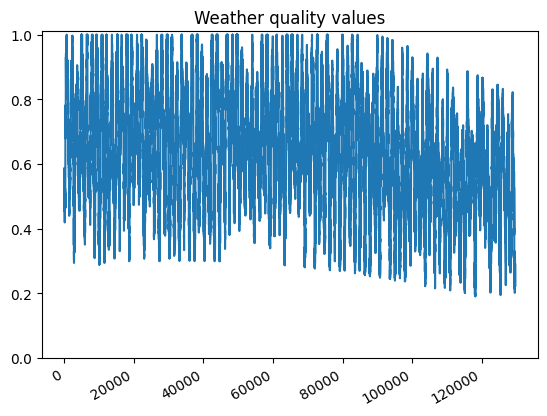

In [5]:

fig, ax = plt.subplots()
ax.plot(data_frame["weather"])
ax.set_title("Weather quality values")
ax.set_ylim([0.0, 1.01])
fig.autofmt_xdate()
plt.show()

## Model Training

Here we test several machine learning models for their ability to learn this data.

Before we test, we split the data into training and test sets

In [6]:
training_features = ["weekday","hour", "minute"]
predicted_features = []
for index in range(nr_rooms):
    predicted_features.append("room_" + str(index))

X = data_frame[training_features]
y = data_frame[predicted_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"Number Training Samples: {len(X_train)}")
print(f"Number Test Samples: {len(X_test)}")



Number Training Samples: 103680
Number Test Samples: 25920


In [7]:
from pandas import DataFrame


model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)



In [8]:
print("Accuracy:",metrics.accuracy_score(y_pred=y_pred, y_true=y_test))
predictions_per_room = y_pred.transpose()
for index in range(room_index):
    accuracy = metrics.accuracy_score(y_pred = predictions_per_room[index], y_true = y_test["room_" + str(index)])
    print(f"- Room {room_names[index]} Accuracy: {accuracy}")


Accuracy: 0.6376929012345679
- Room Bath 1 Accuracy: 1.0
- Room Bath 2 Accuracy: 1.0
- Room Bedroom 1 Accuracy: 0.8524305555555556
- Room Bedroom 2 Accuracy: 0.9071373456790124
- Room Bedroom 3 Accuracy: 0.8563657407407408
- Room Hallway 1 Accuracy: 0.9950231481481482
- Room Hallway 2 Accuracy: 0.9922453703703704
- Room Kitchen Accuracy: 0.9995756172839506
- Room Living Room Accuracy: 0.8371527777777777
- Room Porch Accuracy: 0.8807484567901235


In [9]:
model.predict([[6,22,59]])

c:\Users\frank\Documents\Research\projects\evohome\environment\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]])